# Discriminant Analysis

We use a classification model to predict which customers will default on their credit card debt. 

If you are already familiar with Principal Component Analysis (PCA), note that Discriminant Analysis is similar to PCA:

- both reduce the dimensions in our data
- PCA identifies variables with the most variation
- Discriminant Analysis maximizes the separation of some categorical labels

## Data

To learn more about the data and all of the data preparation steps, take a look at [this page](/docs/data-credit.ipynb). Here, we simply import a Python script which includes all of the necessary steps.

In [1]:
from data_prep_credit import * 

## Linear discriminant analysis

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(solver='svd')
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [3]:
clf.coef_

array([[ 4.81041502e-03,  7.34185754e-06, -5.11940459e-01]])

### Confusion matrix

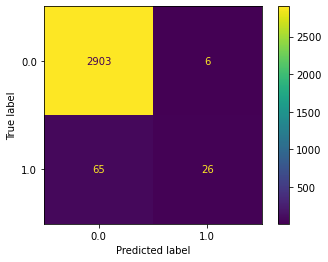

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

Confusion matrix as pandas table:

In [5]:
df_cf = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_pred})
                    
df_cf.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)
df_cf.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,2903,65
Yes,6,26


### Classification report

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      2909
         Yes       0.81      0.29      0.42        91

    accuracy                           0.98      3000
   macro avg       0.90      0.64      0.71      3000
weighted avg       0.97      0.98      0.97      3000



### Change threshold

Use specific threshold

In [7]:
# Obtain probabilities 
y_prob = clf.fit(X_train, y_train).predict_proba(X_test)

In [8]:
# Set threshold 
decision_prob = 0.2

# Build confusion matrix
df_cf = pd.DataFrame({'True default status': y_test,
                    'Predicted default status': y_prob[:,1] > decision_prob})

df_cf.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,0.0,1.0
Predicted default status,,
False,2818,39
True,91,52


In [9]:

print(classification_report(df_cf['True default status'], df_cf['Predicted default status'], target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.99      0.97      0.98      2909
         Yes       0.36      0.57      0.44        91

    accuracy                           0.96      3000
   macro avg       0.67      0.77      0.71      3000
weighted avg       0.97      0.96      0.96      3000



## Quadratic Discriminant Analysis

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()
y_pred = clf.fit(X_train, y_train).predict(X_test)

### Confusion matrix

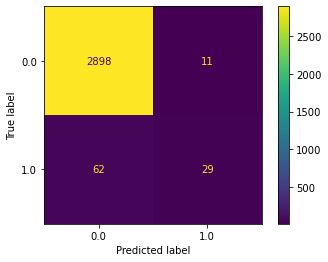

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

### Classification report

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.979     0.996     0.988      2909
         1.0      0.725     0.319     0.443        91

    accuracy                          0.976      3000
   macro avg      0.852     0.657     0.715      3000
weighted avg      0.971     0.976     0.971      3000

